In [75]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='deep')

## Análise exploratória dos dados

In [69]:
with open("data/df_train.pkl", "rb") as p:
    df_train = pickle.load(p)

In [70]:
df_train.head()

,asset_id,runtime,engine1,engine2,engine3,t1,t2,t3,t4,t5,...,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,rul,failure_label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0


In [71]:
sensor_cols =['engine1', 'engine2', 'engine3', 't1','t2','t3','t4','t5','t6','t7','t8','t9','t10',
              't11','t12','t13','t14','t15','t16','t17', 't18', 't19', 't20', 't21']

#### Desvio padrão dos sensores
Olhando para o desvio padrão dos sensores pode-se ver que alguns sensores se descam (t9,t4,t14) <br>
olhando para esses sensores que desviam da média de uma forma tão grande, podemos desconfiar que eles <br>
são os melhores candidatos para se prever uma anomalia

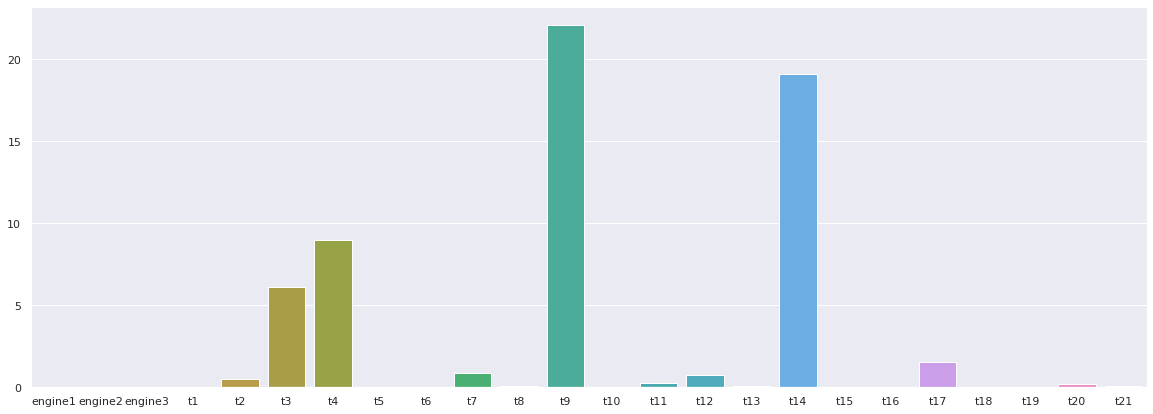

In [72]:
plt.figure(figsize=(20,7))
sns.barplot(df_train[sensor_cols].std().index, df_train[sensor_cols].std())

#### Correlação com RUL

In [73]:
df_train[sensor_cols].corrwith(df_train['rul']).sort_values(ascending=False)

t12        6.719831e-01
t7         6.572227e-01
t21        6.356620e-01
t20        6.294285e-01
t16       -3.969701e-16
t5        -3.969701e-16
engine2   -1.947628e-03
engine1   -3.198458e-03
t6        -1.283484e-01
t14       -3.067689e-01
t9        -3.901016e-01
t13       -5.625688e-01
t8        -5.639684e-01
t3        -5.845204e-01
t17       -6.061536e-01
t2        -6.064840e-01
t15       -6.426670e-01
t4        -6.789482e-01
t11       -6.962281e-01
engine3             NaN
t1                  NaN
t10                 NaN
t18                 NaN
t19                 NaN
dtype: float64

In [74]:
best_corr = ['t12', 't7', 't21', 't20', 't16', 't5', 'engine2', 'engine1', 't6', 't14',
            't9', 't13', 't8', 't3', 't17', 't2', 't15', 't4', 't11', 'rul']

corr = df_train[best_corr].corr()

#### Correlação entre variaveis
algumas variveis estão altamente correlacionadas, e podem ser um problema no modelo, retirá-las ou aplicar PCA pode fazer com que os<br>
modelos performem melhor

exemplo:
* t7 - t12
* t21 - t12
* t20 - t7

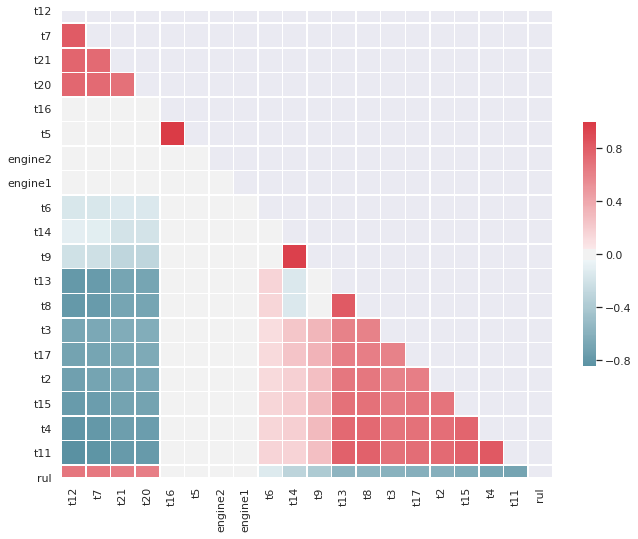

In [80]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Distribuição dos dados

Para a exploração dos dados à seguir, irei usar algumas variavéis com alta correlação positiva (t12, t7), <br>
alta correlação negativa (t11, t4) e com baixa correlação (engine2)

alguns insights:
* Todas a variavéis usadas são uma distribuição normal, exceto engine2
* Nas correlações positivas, conforme o RUL se aproxima de 0, os dados do sensor passam a ter valores menores, <br> 
    o oposto ocorrem com com correlações negativas
* Quando olhamos para o runtime, nas correlações positivas, quanto maior o runtime menor os valores de sensor,<br>
    o oposto acorrem com correlações negativas
* Olhando só para a variavél engine2, ela não muda de acordo com o RUL nem runtime, o que diz que provavelmente<br>
    não irá ajudar na predição de falhas

<Figure size 1080x720 with 0 Axes>

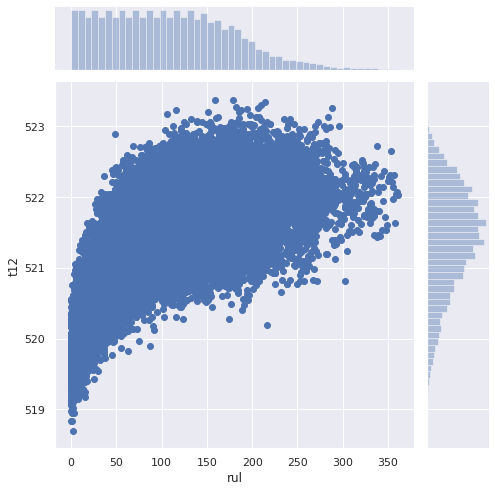

In [130]:
plt.figure(figsize=(15,10))
sns.jointplot(x = 'rul', y = 't12', data = df_train, height=7)

<Figure size 1080x720 with 0 Axes>

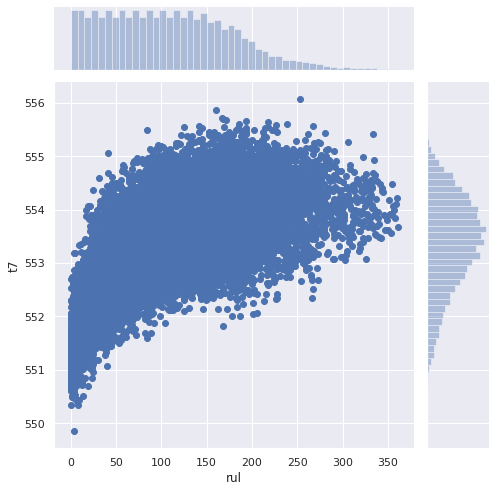

In [129]:
plt.figure(figsize=(15,10))
sns.jointplot(x = 'rul', y = 't7', data = df_train, height=7)

<Figure size 1080x720 with 0 Axes>

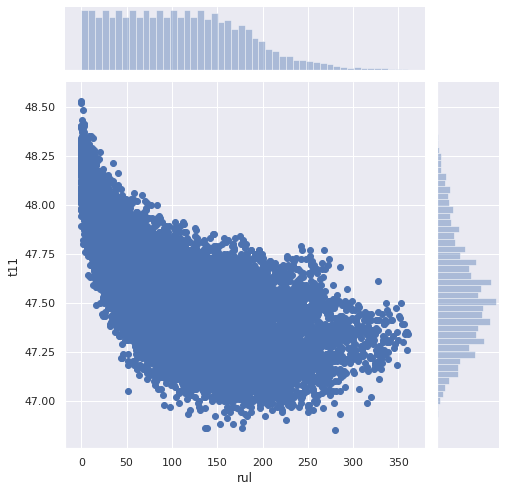

In [128]:
plt.figure(figsize=(15,10))
sns.jointplot(x = 'rul', y = 't11', data = df_train, height=7)

<Figure size 1080x720 with 0 Axes>

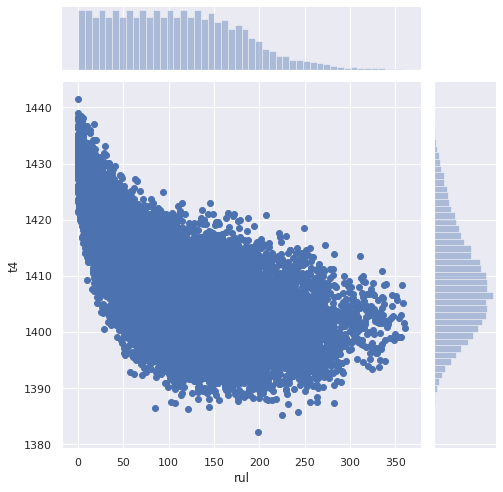

In [131]:
plt.figure(figsize=(15,10))
sns.jointplot(x = 'rul', y = 't4', data = df_train, height=7)

<Figure size 1080x720 with 0 Axes>

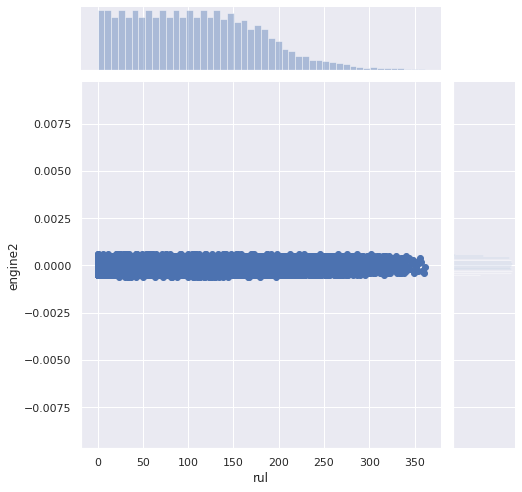

In [132]:
plt.figure(figsize=(15,10))
sns.jointplot(x = 'rul', y = 'engine2', data = df_train, height=7)

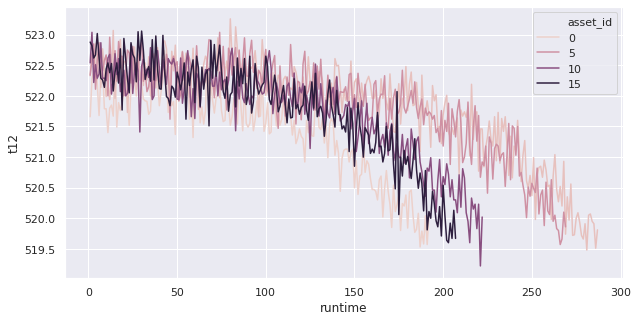

In [123]:
plt.figure(figsize=(10,5))
sns.lineplot(x="runtime", y="t12", hue="asset_id",
                  data=df_train.query('asset_id in (1, 2, 5, 10, 15)'))

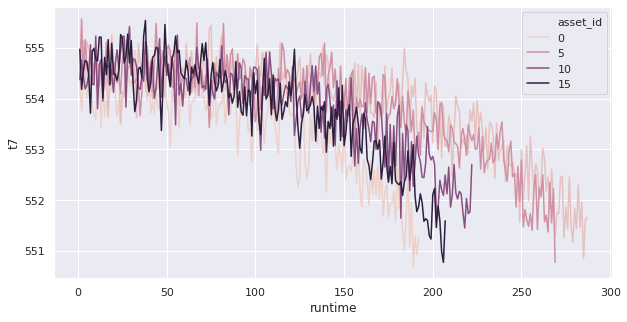

In [124]:
plt.figure(figsize=(10,5))
sns.lineplot(x="runtime", y="t7", hue="asset_id",
                  data=df_train.query('asset_id in (1, 2, 5, 10, 15)'))

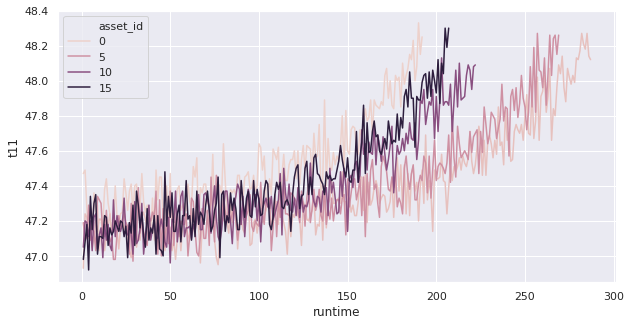

In [125]:
plt.figure(figsize=(10,5))
sns.lineplot(x="runtime", y="t11", hue="asset_id",
                  data=df_train.query('asset_id in (1, 2, 5, 10, 15)'))

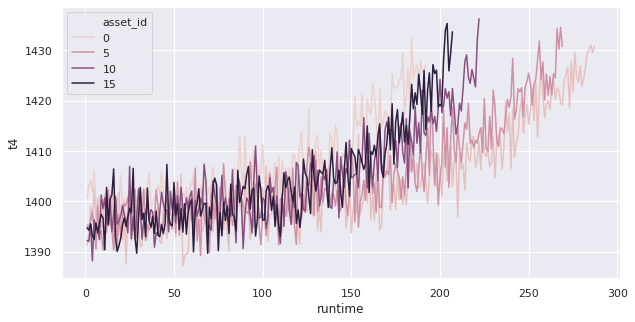

In [126]:
plt.figure(figsize=(10,5))
sns.lineplot(x="runtime", y="t4", hue="asset_id",
                  data=df_train.query('asset_id in (1, 2, 5, 10, 15)'))

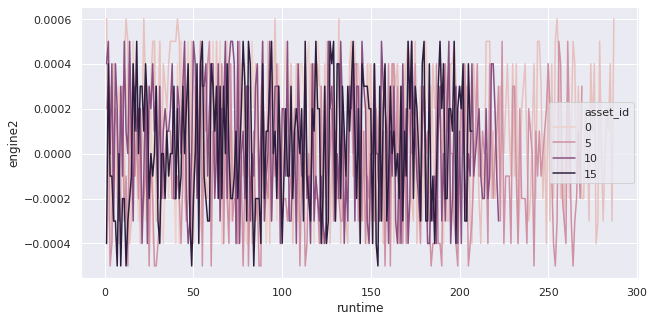

In [127]:
plt.figure(figsize=(10,5))
sns.lineplot(x="runtime", y="engine2", hue="asset_id",
                  data=df_train.query('asset_id in (1, 2, 5, 10, 15)'))

### Conclusão

* Olhando para o grafico de correlação entre a variável target (RUL) e os sensores, é possivel ver sensores com alta correlação
* O comportamento dos valores dos sensores com alta correlaçao seguem um padrão quando o RUL aumenta ou diminui, o mesmo vale para runtime
* As principais variavéis seguem uma distribuição normal